## Normalization
The data used in this notebook is lymphocyte data for one patient's B cells and T cells. Here we plot the runs to determine the need for normalization and test normalization techniques.

First, we import our loader module. This brings the functions defined there (in our repository at ~/load_data.py) into scope so we can use them in this script. Then we can load our data and store it as <code>data_raw</code>.

In [1]:
import load_data
data_raw = load_data.load_max_quant()

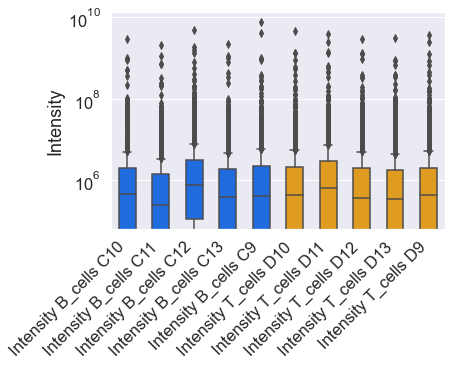

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["#0066ff","#0066ff","#0066ff","#0066ff","#0066ff","orange","orange","orange","orange", "orange"]
sns.set(font_scale=1.5)
figure = sns.boxplot(data=data_raw, width=.5, palette=colors)
figure.set_ylabel("Intensity")
figure.set_yscale("log")
plt.setp(figure.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show()

Intensity B_cells C10    None
Intensity B_cells C11    None
Intensity B_cells C12    None
Intensity B_cells C13    None
Intensity B_cells C9     None
Intensity T_cells D10    None
Intensity T_cells D11    None
Intensity T_cells D12    None
Intensity T_cells D13    None
Intensity T_cells D9     None
dtype: object

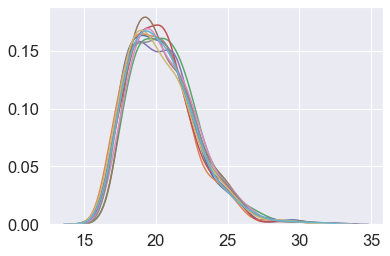

In [3]:
from numpy import log2
from numpy import nan
def dist(ser, logscale=True):
    if logscale:f=sns.distplot(log2(ser.replace(0,nan).dropna()), hist=False)
    else:f=sns.distplot(ser, hist=False)
    f.set_xlabel("")
    
    
data_raw.apply(dist)

Here we filter for proteins widely identified in each cell type.

In [4]:
def check_present(row):
    bool_row = []
    for i in row:
        bool_row.append(bool(i))
    return sum(bool_row)

def check_three_of_each_type(row, cell_types=["B_cells", "T_cells"]):
    present_in_types = []
    for i in cell_types:
        cells_of_type = list(s for s in row.index if i in s)
        data_by_type = row.loc[cells_of_type]
        in_type = check_present(data_by_type)
        three_in_type = bool(in_type > 2)
        present_in_types.append(three_in_type)
    if sum(present_in_types) == len(cell_types):
        return True
    else: return False
    
indecies = data_raw.apply(check_three_of_each_type, axis=1)
data_with_threes = data_raw[indecies]

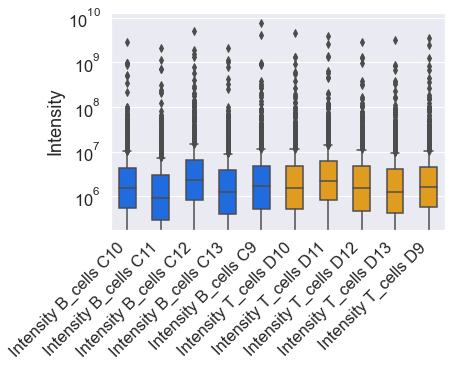

In [5]:
figure = sns.boxplot(data=data_with_threes, width=.5, palette=colors)
figure.set_yscale("log")
figure.set_ylabel("Intensity")
plt.setp(figure.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show()

Intensity B_cells C10    None
Intensity B_cells C11    None
Intensity B_cells C12    None
Intensity B_cells C13    None
Intensity B_cells C9     None
Intensity T_cells D10    None
Intensity T_cells D11    None
Intensity T_cells D12    None
Intensity T_cells D13    None
Intensity T_cells D9     None
dtype: object

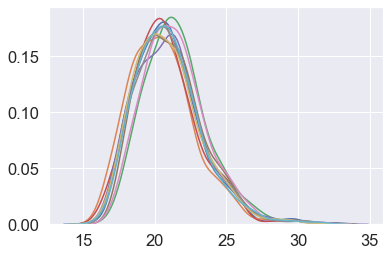

In [6]:
data_with_threes.apply(dist)

Apply SL normalization

In [7]:
from statistics import mean

target = mean(data_with_threes.apply(sum))

def scale_col(column, target):
    normalization_factor = target/sum(column)
    normalized_data = column*normalization_factor
    return normalized_data

data_sl = data_with_threes.apply(scale_col, target=target)

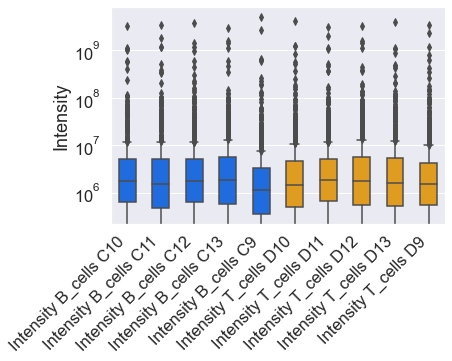

In [8]:
figure = sns.boxplot(data=data_sl, width=.5, palette=colors)
figure.set_yscale("log")
figure.set_ylabel("Intensity")
plt.setp(figure.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show()

Intensity B_cells C10    None
Intensity B_cells C11    None
Intensity B_cells C12    None
Intensity B_cells C13    None
Intensity B_cells C9     None
Intensity T_cells D10    None
Intensity T_cells D11    None
Intensity T_cells D12    None
Intensity T_cells D13    None
Intensity T_cells D9     None
dtype: object

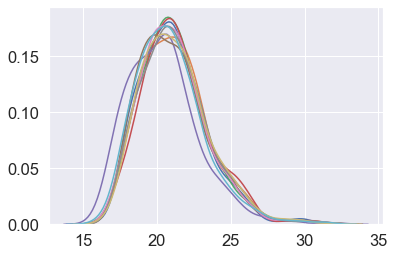

In [9]:
data_sl.apply(dist)

global median normalization
https://datascienceplus.com/proteomics-data-analysis-2-3-data-filtering-and-missing-value-imputation/

In [10]:
from numpy import nan
from numpy import log2
from statistics import median

In [11]:
data_log2 = log2(data_raw.replace(0,nan))
data_log2_medNorm = data_log2.apply(lambda series: series-median(series.dropna()))

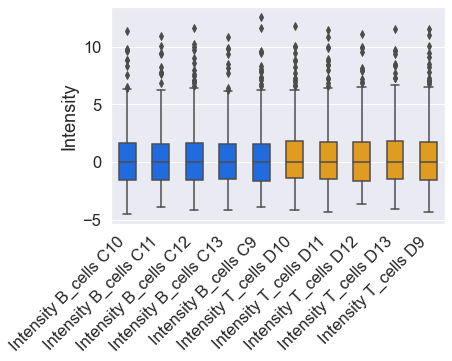

In [13]:
figure = sns.boxplot(data=data_log2_medNorm, width=.5, palette=colors)
figure.set_ylabel("Intensity")
plt.setp(figure.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show()

Intensity B_cells C10    None
Intensity B_cells C11    None
Intensity B_cells C12    None
Intensity B_cells C13    None
Intensity B_cells C9     None
Intensity T_cells D10    None
Intensity T_cells D11    None
Intensity T_cells D12    None
Intensity T_cells D13    None
Intensity T_cells D9     None
dtype: object

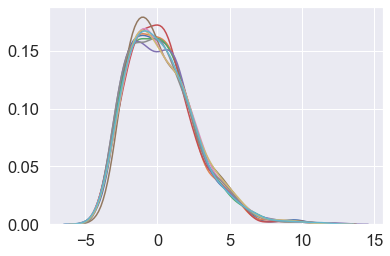

In [12]:
data_log2_medNorm.apply(dist, logscale=False)

The global median normalization works well with this data. The dataset is now log2 and scaled to zero.